**2.数据可视化**

**2.1.按照周一到周日分7类统计数据**

2.1.1.将所有购买记录，按照星期一、星期二、……、星期日分别为7个类别，统计每个类别中的购买记录总数、对应的额用户总数、商品总数。

导入相关库

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_rows', 6)#设置显示的最大行数为6行

定义文件名

In [2]:
ACTION_201602_FILE = "../data/data_2月用户行为数据.csv"
ACTION_201603_FILE = "../data/data_3月用户行为数据.csv"
ACTION_201604_FILE = "../data/data_4月用户行为数据.csv"
COMMENT_FILE = "../data/data_评论表.csv"
PRODUCT_FILE = "../data/data_商品表.csv"
USER_FILE = "../data/data_用户表.csv"

编写get_user_product_action_data，分块读取数据

In [3]:
#编写函数get_user_product_action_data，分块读取按数据*（frame数据文件名，chunk_size每次读取的数据个数）
def get_user_product_action_data(fname, chunk_size=50000):
    reader = pd.read_csv(fname,chunksize=chunk_size,engine='python',encoding = 'utf-8')
    chunks = []
    for chunk in reader:
        chunk= chunk[["用户ID", "商品ID", "行为类别", "时间"]]#读取“用户ID”、“商品ID”、“行为类别”、“时间”4个字段的数据
        chunks.append(chunk)
    #将数据块拼接为pandas dataframe格式
    #ignore_index=True，按传递的顺序连接各数据块，重新分配实际索引的范围。
    action = pd.concat(chunks, ignore_index=True)
    
    action = action[action['行为类别'] == 4] #取用户真实购买的行为数据
    
    return action[["用户ID", "商品ID", "时间"]] 

调用get_user_product_action_data函数，读取每个月份的购买情况

In [4]:
action = [] 
action.append(get_user_product_action_data(fname=ACTION_201602_FILE))
action.append(get_user_product_action_data(fname=ACTION_201603_FILE))
action.append(get_user_product_action_data(fname=ACTION_201604_FILE))
#ignore_index=True，按传递的顺序连接各数据块，重新分配实际索引的范围。
action = pd.concat(action, ignore_index=True)
action

,用户ID,商品ID,时间
0,269365,166345,2016-02-01 00:01:00
1,235443,36692,2016-02-01 00:02:00
2,247689,9112,2016-02-01 00:03:00
...,...,...,...
48249,275840,18412,2016-04-15 23:56:00
48250,291147,70491,2016-04-15 23:58:00
48251,254642,25003,2016-04-15 23:59:00


In [5]:
action['时间'] = pd.to_datetime(action['时间'])#将“时间”字段转换为datatime类型
#将时间转化为星期的形式（周一为1，周日为7
#使用datatime类对象，并以整数形式返回星期几，其中返回结果是：周一为0，周日为6，对返回结果再“+1”，成为标准形式（周一为1，周日为7）
action['时间'] = action['时间'].apply(lambda x: x.weekday() + 1)
action

,用户ID,商品ID,时间
0,269365,166345,1
1,235443,36692,1
2,247689,9112,1
...,...,...,...
48249,275840,18412,5
48250,291147,70491,5
48251,254642,25003,5


统计周一到周日7个类别的购买记录中对应的用户总数

In [6]:
#以时间为指标，对用户进行分组，unique：返回列的所有唯一值（特征的所有唯一值）：nunique：返回的是唯一值的个数
user = action.groupby('时间')['用户ID'].nunique()
user = user.to_frame().reset_index()#重置索引，to_frame:将数组转换为Dataframe格式
user.columns = ['星期', '用户数量']#定义列名
user

,星期,用户数量
0,1,6162
1,2,6946
2,3,5001
...,...,...
4,5,6049
5,6,4174
6,7,3710


统计周一到周日7个类别购买记录中对应的商品总数

In [7]:
product = action.groupby('时间')['商品ID'].nunique()#以时间为指标，对商品进行分组
print(product)
product = product.to_frame().reset_index()#重置索引，to_frame：将数组转换为DataFrame格式
product.columns = ['星期', '商品数量'] #定义列名
product

时间
1    1844
2    1996
3    1800
     ... 
5    1855
6    1643
7    1578
Name: 商品ID, Length: 7, dtype: int64


,星期,商品数量
0,1,1844
1,2,1996
2,3,1800
...,...,...
4,5,1855
5,6,1643
6,7,1578


统计周一到周日7个类别购买记录中对应的商品总数

In [8]:
action_groupByTime=action.groupby('时间', as_index=False).size()
action_groupByTime

,时间,size
0,1,7759
1,2,8869
2,3,6262
...,...,...
4,5,7505
5,6,5143
6,7,4636


In [9]:
# action_groupByTime = action_groupByTime.to_frame().reset_index()#重置索引，to_frame：将数组转换为DataFrame格式
action_groupByTime.columns = ['星期', '用户-商品数量组合']#定义列名
action_groupByTime

,星期,用户-商品数量组合
0,1,7759
1,2,8869
2,3,6262
...,...,...
4,5,7505
5,6,5143
6,7,4636


画图展示统计数据

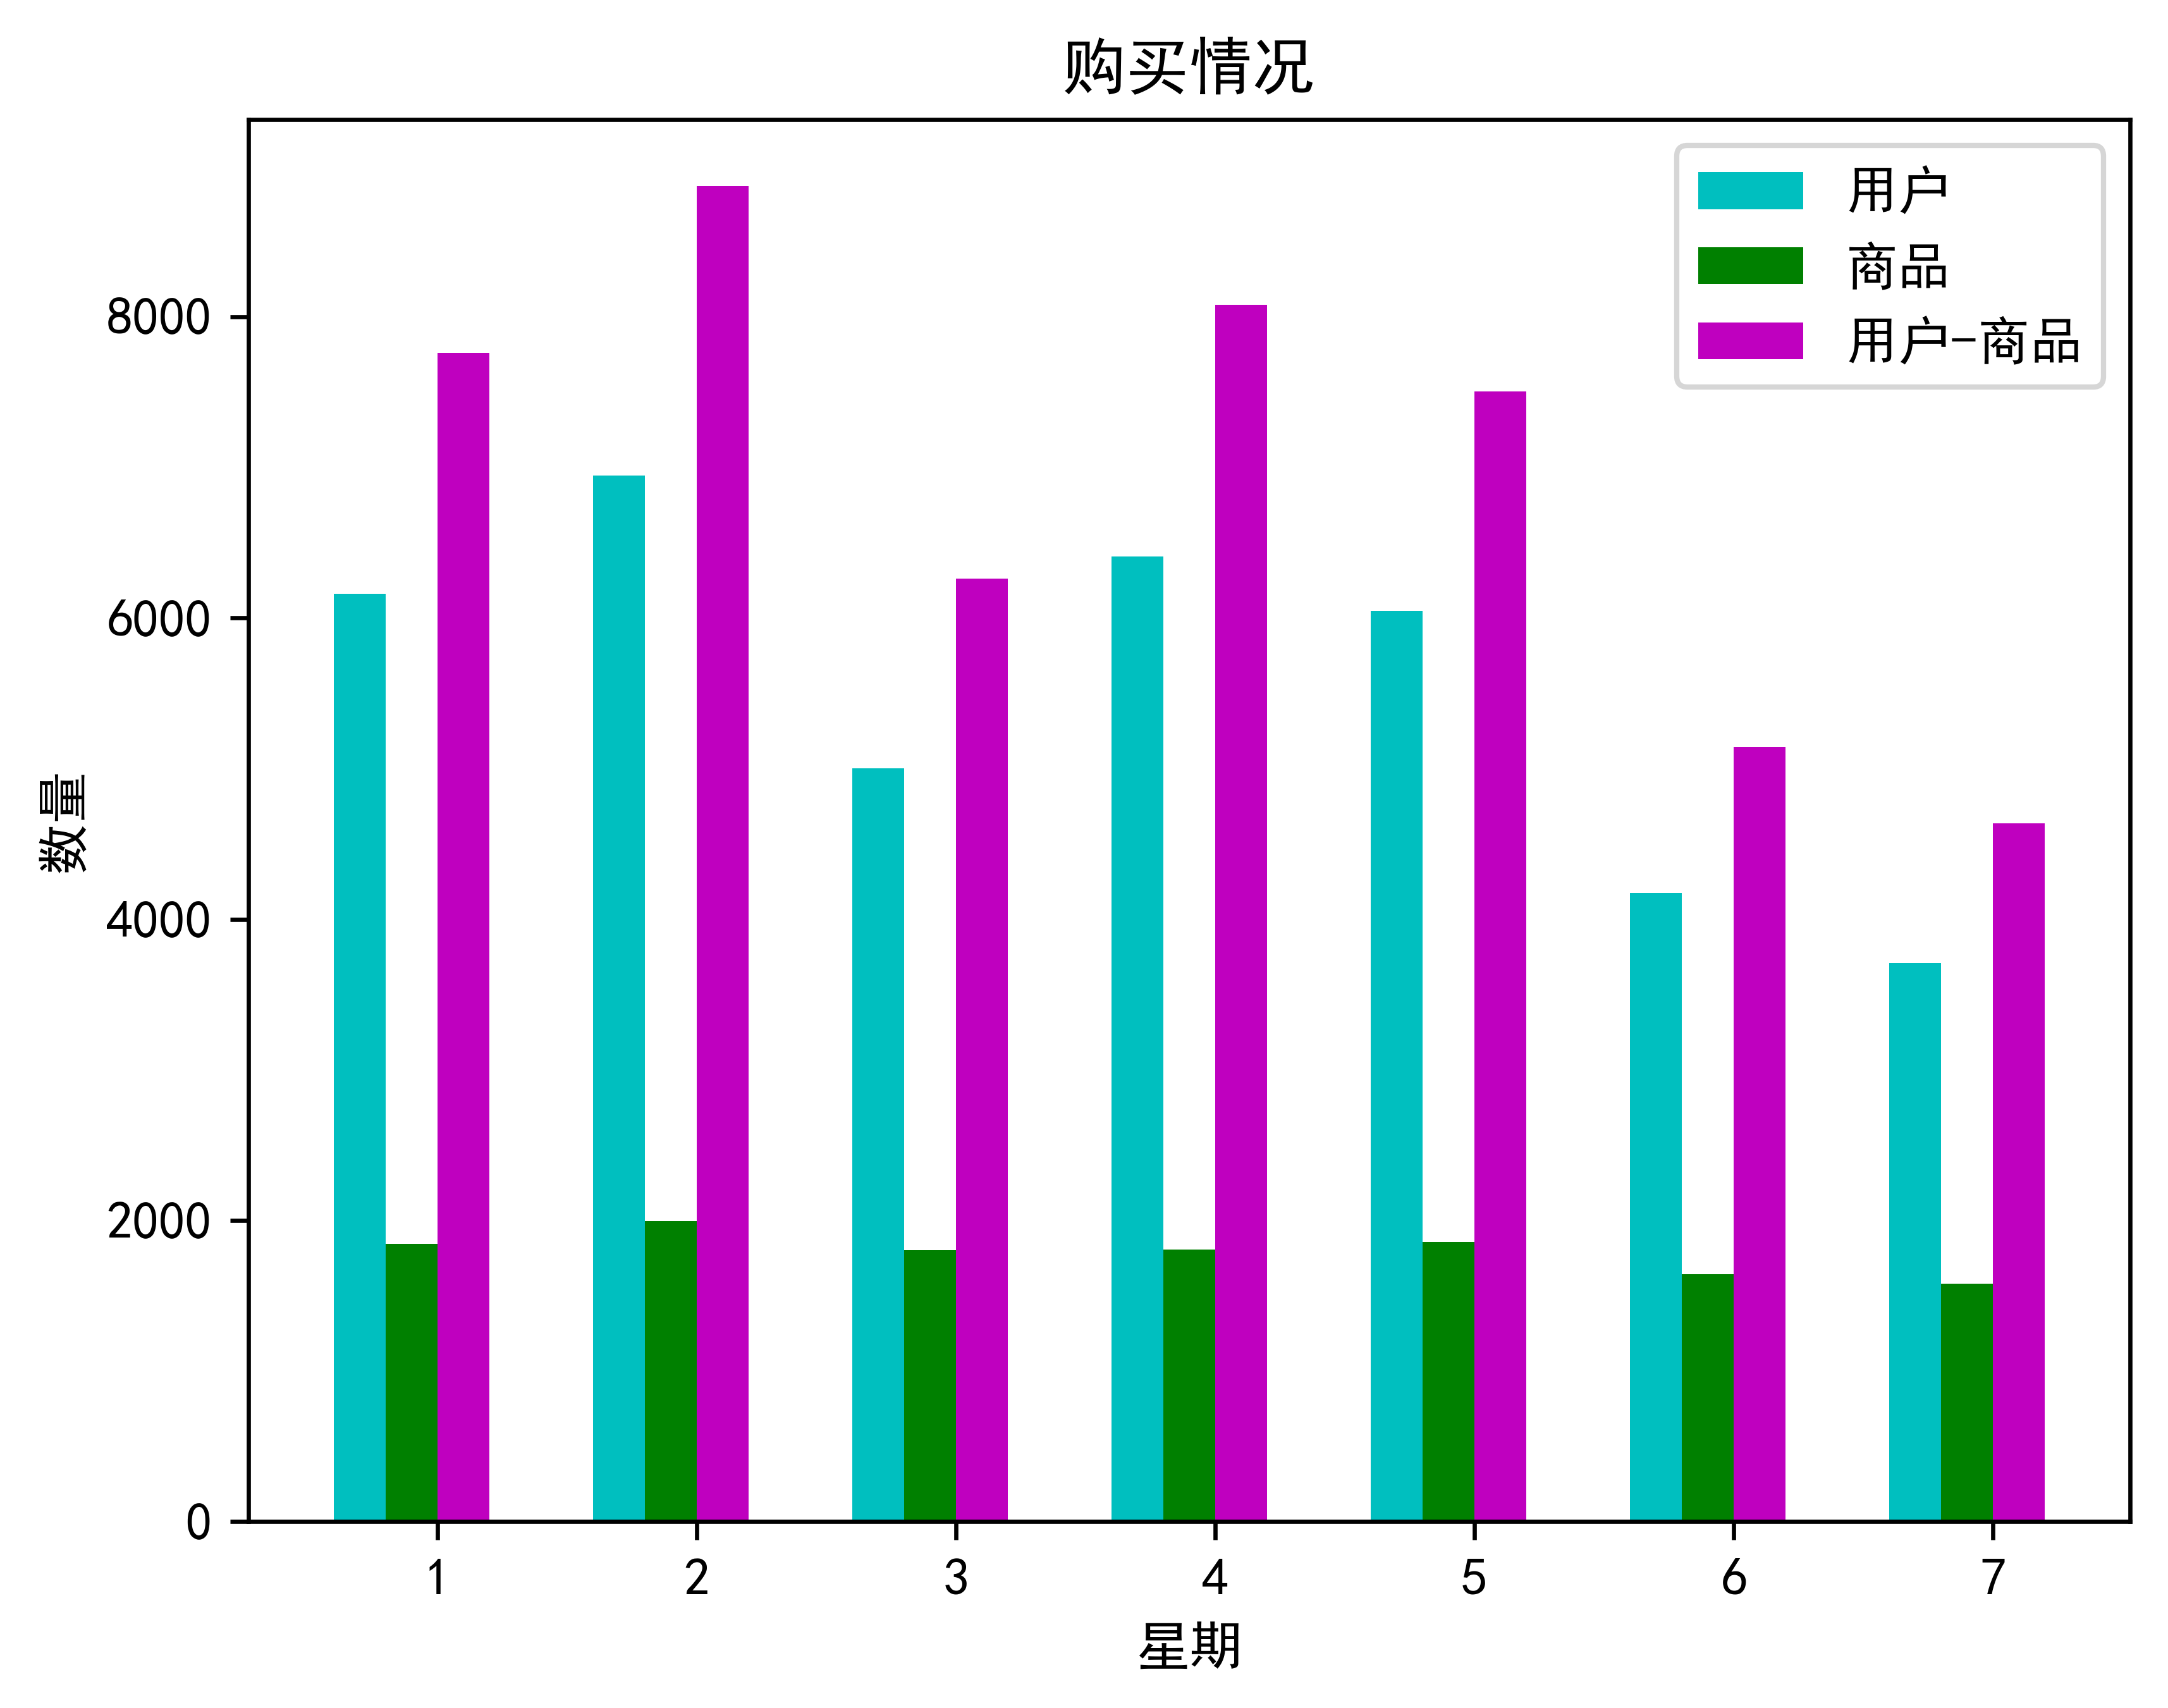

In [10]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['simhei']
plt.figure(dpi=600)

bar_width = 0.2
plt.bar(user['星期'], user['用户数量'], bar_width,color='c', label='用户')#画出各类别购买记录中对用的用户总数
plt.bar(product['星期']+bar_width, product['商品数量'],bar_width, color='g', label='商品')#画出各类别购买记录中中对应的商品总数
plt.bar(action_groupByTime['星期']+bar_width*2, action_groupByTime['用户-商品数量组合'],bar_width,color='m', label='用户-商品')
#画出各类别购买记录总数

plt.xlabel('星期');plt.ylabel('数量');plt.title('购买情况');
day_range = range(1,len(user['星期']) + 1, 1)
plt.xticks(user['星期'] + bar_width * 3 / 2., day_range)
plt.legend()#画出图例

上诉结果解释：周六，周日购买记录少

2.1.2.将所有的购买记录，按照星期一、星期二、……、星期日分为七个类别，统计每个类别中的购买记录对应的商品类别总数

编写get_class_brand_action_time，分块读取数据

In [11]:
def get_class_brand_action_time(fname, chunk_size=20000):
    reader = pd.read_csv(fname, chunksize = chunk_size,engine='python', encoding = 'utf-8')
    chunks = []
    for chunk in reader:
        chunk= chunk[["商品类别", "商品品牌", "行为类别", "时间"]]
        chunks.append(chunk)
    #将数据拼接为pandas dataframe格式
    #ignore_index=True，按传递的顺序连接各数据块，重新分配实际索引的范围
    action = pd.concat(chunks, ignore_index=True)
    #取购买——实际下单（行为类别=4）的行为数据
    action = action[action['行为类别'] == 4]
    
    return action[["商品类别", "商品品牌", "行为类别", "时间"]]

调用get_class_brand_action_time函数，读取2、3、4月份数据并合并

In [12]:
action = []#定义action空列表

action.append(get_class_brand_action_time(fname=ACTION_201602_FILE))
action.append(get_class_brand_action_time(fname=ACTION_201603_FILE))
action.append(get_class_brand_action_time(fname=ACTION_201604_FILE))
#将2、3、4月用户行为数据进行拼接
#ignore_index=True，按传递的顺序连接各数据块，重新分配实际索引的范围
action = pd.concat(action, ignore_index=True)

action#展示拼接后的数据

,商品类别,商品品牌,行为类别,时间
0,9,306,4,2016-02-01 00:01:00
1,4,174,4,2016-02-01 00:02:00
2,5,78,4,2016-02-01 00:03:00
...,...,...,...,...
48249,8,214,4,2016-04-15 23:56:00
48250,6,306,4,2016-04-15 23:58:00
48251,5,489,4,2016-04-15 23:59:00


转换时间格式

In [13]:
action['时间'] = pd.to_datetime(action['时间'])#将时间字段转换为datatime类型
#将时间转换为星期的形式（周一为1，周日为7）
#使用datatime类对象，并以整数形式返回星期几，其中返回结果是：周一为0，周日为6.对返回结果再“+1”，成为标准形式（周一为1，周日为7）
action['时间'] = action['时间'].apply(lambda x: x.weekday() + 1)

In [14]:
action

,商品类别,商品品牌,行为类别,时间
0,9,306,4,1
1,4,174,4,1
2,5,78,4,1
...,...,...,...,...
48249,8,214,4,5
48250,6,306,4,5
48251,5,489,4,5


统计用户购买的各类商品总数

In [15]:
action.groupby(action['商品类别']).count() 

,商品品牌,行为类别,时间
商品类别,,,
4,9326,9326,9326
5,8138,8138,8138
6,6982,6982,6982
...,...,...,...
9,4104,4104,4104
10,189,189,189
11,18,18,18


按照商品类别分组，统计每个商品类别的用户购买行为数据总数

时间  商品类别
1   4       1466
    5       1417
    6       1162
            ... 
7   9        390
    10        21
    11         5
Name: 商品品牌, Length: 53, dtype: int64
商品类别      4       5       6       7       8      9     10   11
时间                                                            
1     1466.0  1417.0  1162.0  1089.0  1892.0  691.0  39.0  3.0
2     1421.0  1320.0  1103.0  1255.0  2866.0  872.0  32.0  NaN
3     1270.0  1048.0   929.0   846.0  1567.0  566.0  32.0  4.0
..       ...     ...     ...     ...     ...    ...   ...  ...
5     1373.0  1253.0  1141.0  1012.0  2135.0  566.0  25.0  NaN
6      811.0   937.0   820.0   601.0  1501.0  453.0  20.0  NaN
7      830.0   842.0   678.0   584.0  1286.0  390.0  21.0  5.0

[7 rows x 8 columns]


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

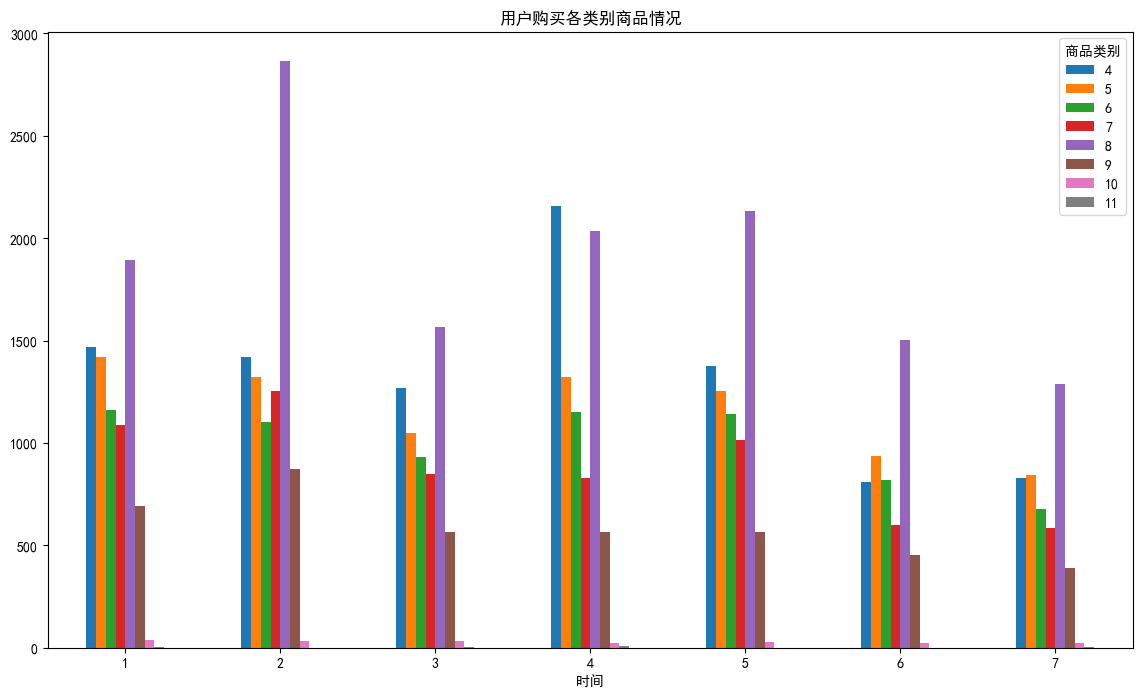

In [16]:
product = action['商品品牌'].groupby([action['时间'],action['商品类别']]).count()#统计周一、周二、……、周日每个类别的购买记录中，各类别商品总数
print(product)
product=product.unstack()#使用unstack函数，将行索引变成列索引
print(product)
product.plot(kind='bar',title='用户购买各类别商品情况',figsize=(14,8))#画出各类别商品总数的柱状图

import pylab as pl
pl.xticks(rotation=0)

上诉结果解释：星期二买类别8的最多，星期天最少

**2.2.统计每个月每天的数据**

2.2.1.统计2016年2月当天的购买记录总数，对应的用户总数、商品总数

In [17]:
action = get_user_product_action_data(fname=ACTION_201602_FILE) #读入2月份数据
action

,用户ID,商品ID,时间
331,269365,166345,2016-02-01 00:01:00
629,235443,36692,2016-02-01 00:02:00
960,247689,9112,2016-02-01 00:03:00
...,...,...,...
11478521,300214,102335,2016-02-29 23:50:00
11480851,213442,48000,2016-02-29 23:54:00
11483908,228994,165190,2016-02-29 23:58:00


In [18]:
action['时间'] = pd.to_datetime(action['时间']).apply(lambda x: x.day)#将time字段转换为datatime类型并使用lambda函数将时间转为天
action 

,用户ID,商品ID,时间
331,269365,166345,1
629,235443,36692,1
960,247689,9112,1
...,...,...,...
11478521,300214,102335,29
11480851,213442,48000,29
11483908,228994,165190,29


按照每一天分别统计购买记录总数、对应的用户总数、商品总数。

In [19]:
#统计购买记录对应的用户总数
#以时间为指标，对用户进行分组，unique：返回列的所有唯一值（特征的所有唯一值）；nunique：返回的是唯一值的个数
user = action.groupby('时间')['用户ID'].nunique()
user = user.to_frame().reset_index()
user.columns = ['天', '用户数量']

product = action.groupby('时间')['商品ID'].nunique()
product = product.to_frame().reset_index()
product.columns = ['天', '商品数量']

action_groupByTime = action.groupby('时间', as_index=False).size()
# action_groupByTime = action_groupByTime.to_frame().reset_index()
action_groupByTime.columns = ['天', '用户-商品数量']

In [20]:
user.head()#展示2月份每天购买记录对应的用户数据

,天,用户数量
0,1,454
1,2,383
2,3,302
3,4,256
4,5,160


In [21]:
product.head()#展示2月份每天购买记录对应的商品总数

,天,商品数量
0,1,352
1,2,311
2,3,255
3,4,213
4,5,147


In [22]:
action_groupByTime.head()#展示2月份每天购买记录总数

,天,用户-商品数量
0,1,539
1,2,462
2,3,357
3,4,297
4,5,179


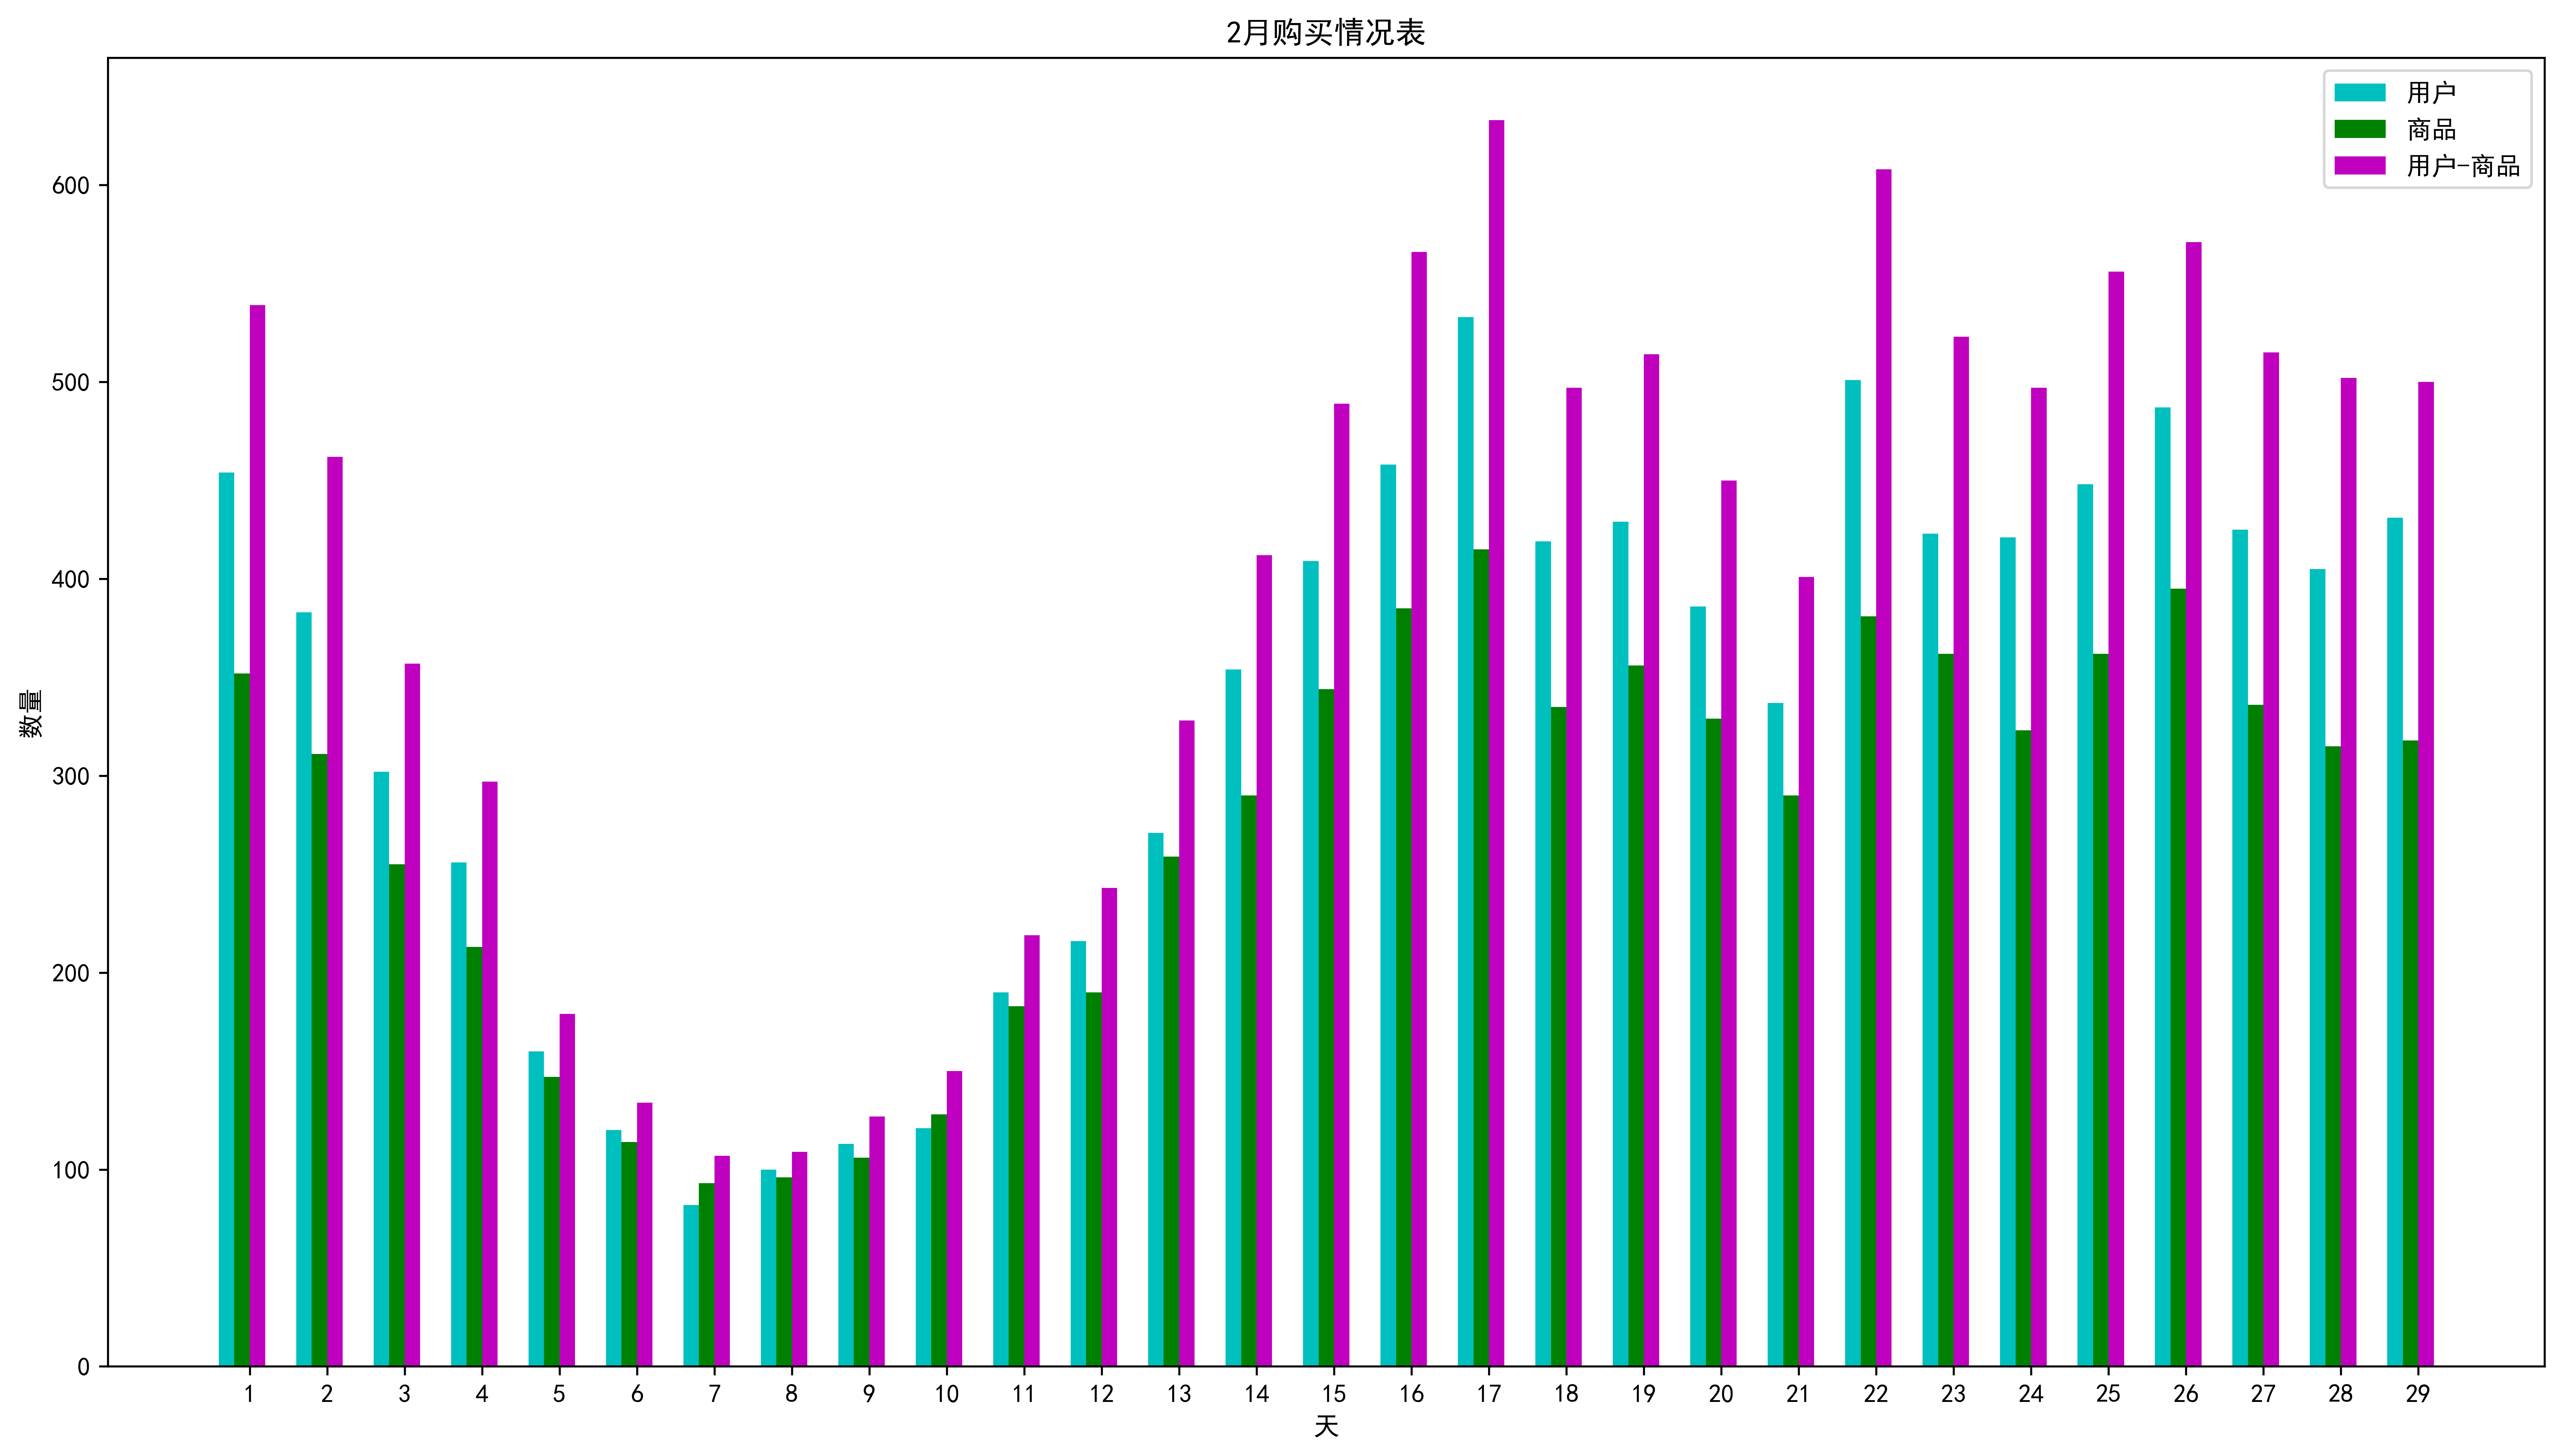

In [23]:
plt.rcParams['font.sans-serif']=['simhei']

plt.figure(figsize=(14,8),dpi=600)
bar_width = 0.2

plt.bar(user['天'], user['用户数量'], bar_width, color='c', label='用户')#画出每天的购买记录中对应的用户总数
plt.bar(product['天']+bar_width, product['商品数量'], bar_width,color='g', label='商品')#画出每天的购买记录中对应的商品总数
plt.bar(action_groupByTime['天']+bar_width*2, action_groupByTime['用户-商品数量'],bar_width,  color='m', label='用户-商品')
#画出每天的购买记录总数

plt.xlabel('天');plt.ylabel('数量');plt.title('2月购买情况表')#设置x，y轴名称、图标题

day_range = range(1,len(user['天']) + 1, 1)#设置x轴标签范围
plt.xticks(user['天'] + bar_width * 3 / 2., day_range)#设置x轴标签

plt.tight_layout() #自动调整子图参数，使之填充整个图像区域

plt.legend()#画出图例

In [24]:
action = get_user_product_action_data(fname=ACTION_201603_FILE)
action

,用户ID,商品ID,时间
259,220734,15921,2016-03-01 00:00:00
263,280498,85780,2016-03-01 00:00:00
269,286673,85780,2016-03-01 00:00:00
...,...,...,...
25911798,243886,65785,2016-03-31 23:54:00
25912526,288593,126918,2016-03-31 23:55:00
25915641,230678,112141,2016-03-31 23:59:00


In [25]:
action['时间'] = pd.to_datetime(action['时间']).apply(lambda x: x.day)

In [26]:
action

,用户ID,商品ID,时间
259,220734,15921,1
263,280498,85780,1
269,286673,85780,1
...,...,...,...
25911798,243886,65785,31
25912526,288593,126918,31
25915641,230678,112141,31


按照每一天分别统计购买记录总数、对应的用户总数、商品总数。

In [27]:
user = action.groupby('时间')['用户ID'].nunique()
user = user.to_frame().reset_index()
user.columns = ['天', '用户数量']

product = action.groupby('时间')['商品ID'].nunique()
product = product.to_frame().reset_index()
product.columns = ['天', '商品数量']

action_groupByTime = action.groupby('时间', as_index=False).size()
# action_groupByTime = action_groupByTime.to_frame().reset_index()
action_groupByTime.columns = ['天', '用户-商品数量']

In [28]:
user.head()#展示3月份每天购买记录对应的用户总数

,天,用户数量
0,1,913
1,2,554
2,3,540
3,4,565
4,5,478


In [29]:
product.head()#展示3月份每天购买记录对应的商品总数

,天,商品数量
0,1,551
1,2,437
2,3,389
3,4,427
4,5,356


In [30]:
action_groupByTime.head()#展示3月份每天购买记录总数

,天,用户-商品数量
0,1,1140
1,2,685
2,3,634
3,4,700
4,5,563


画图展示

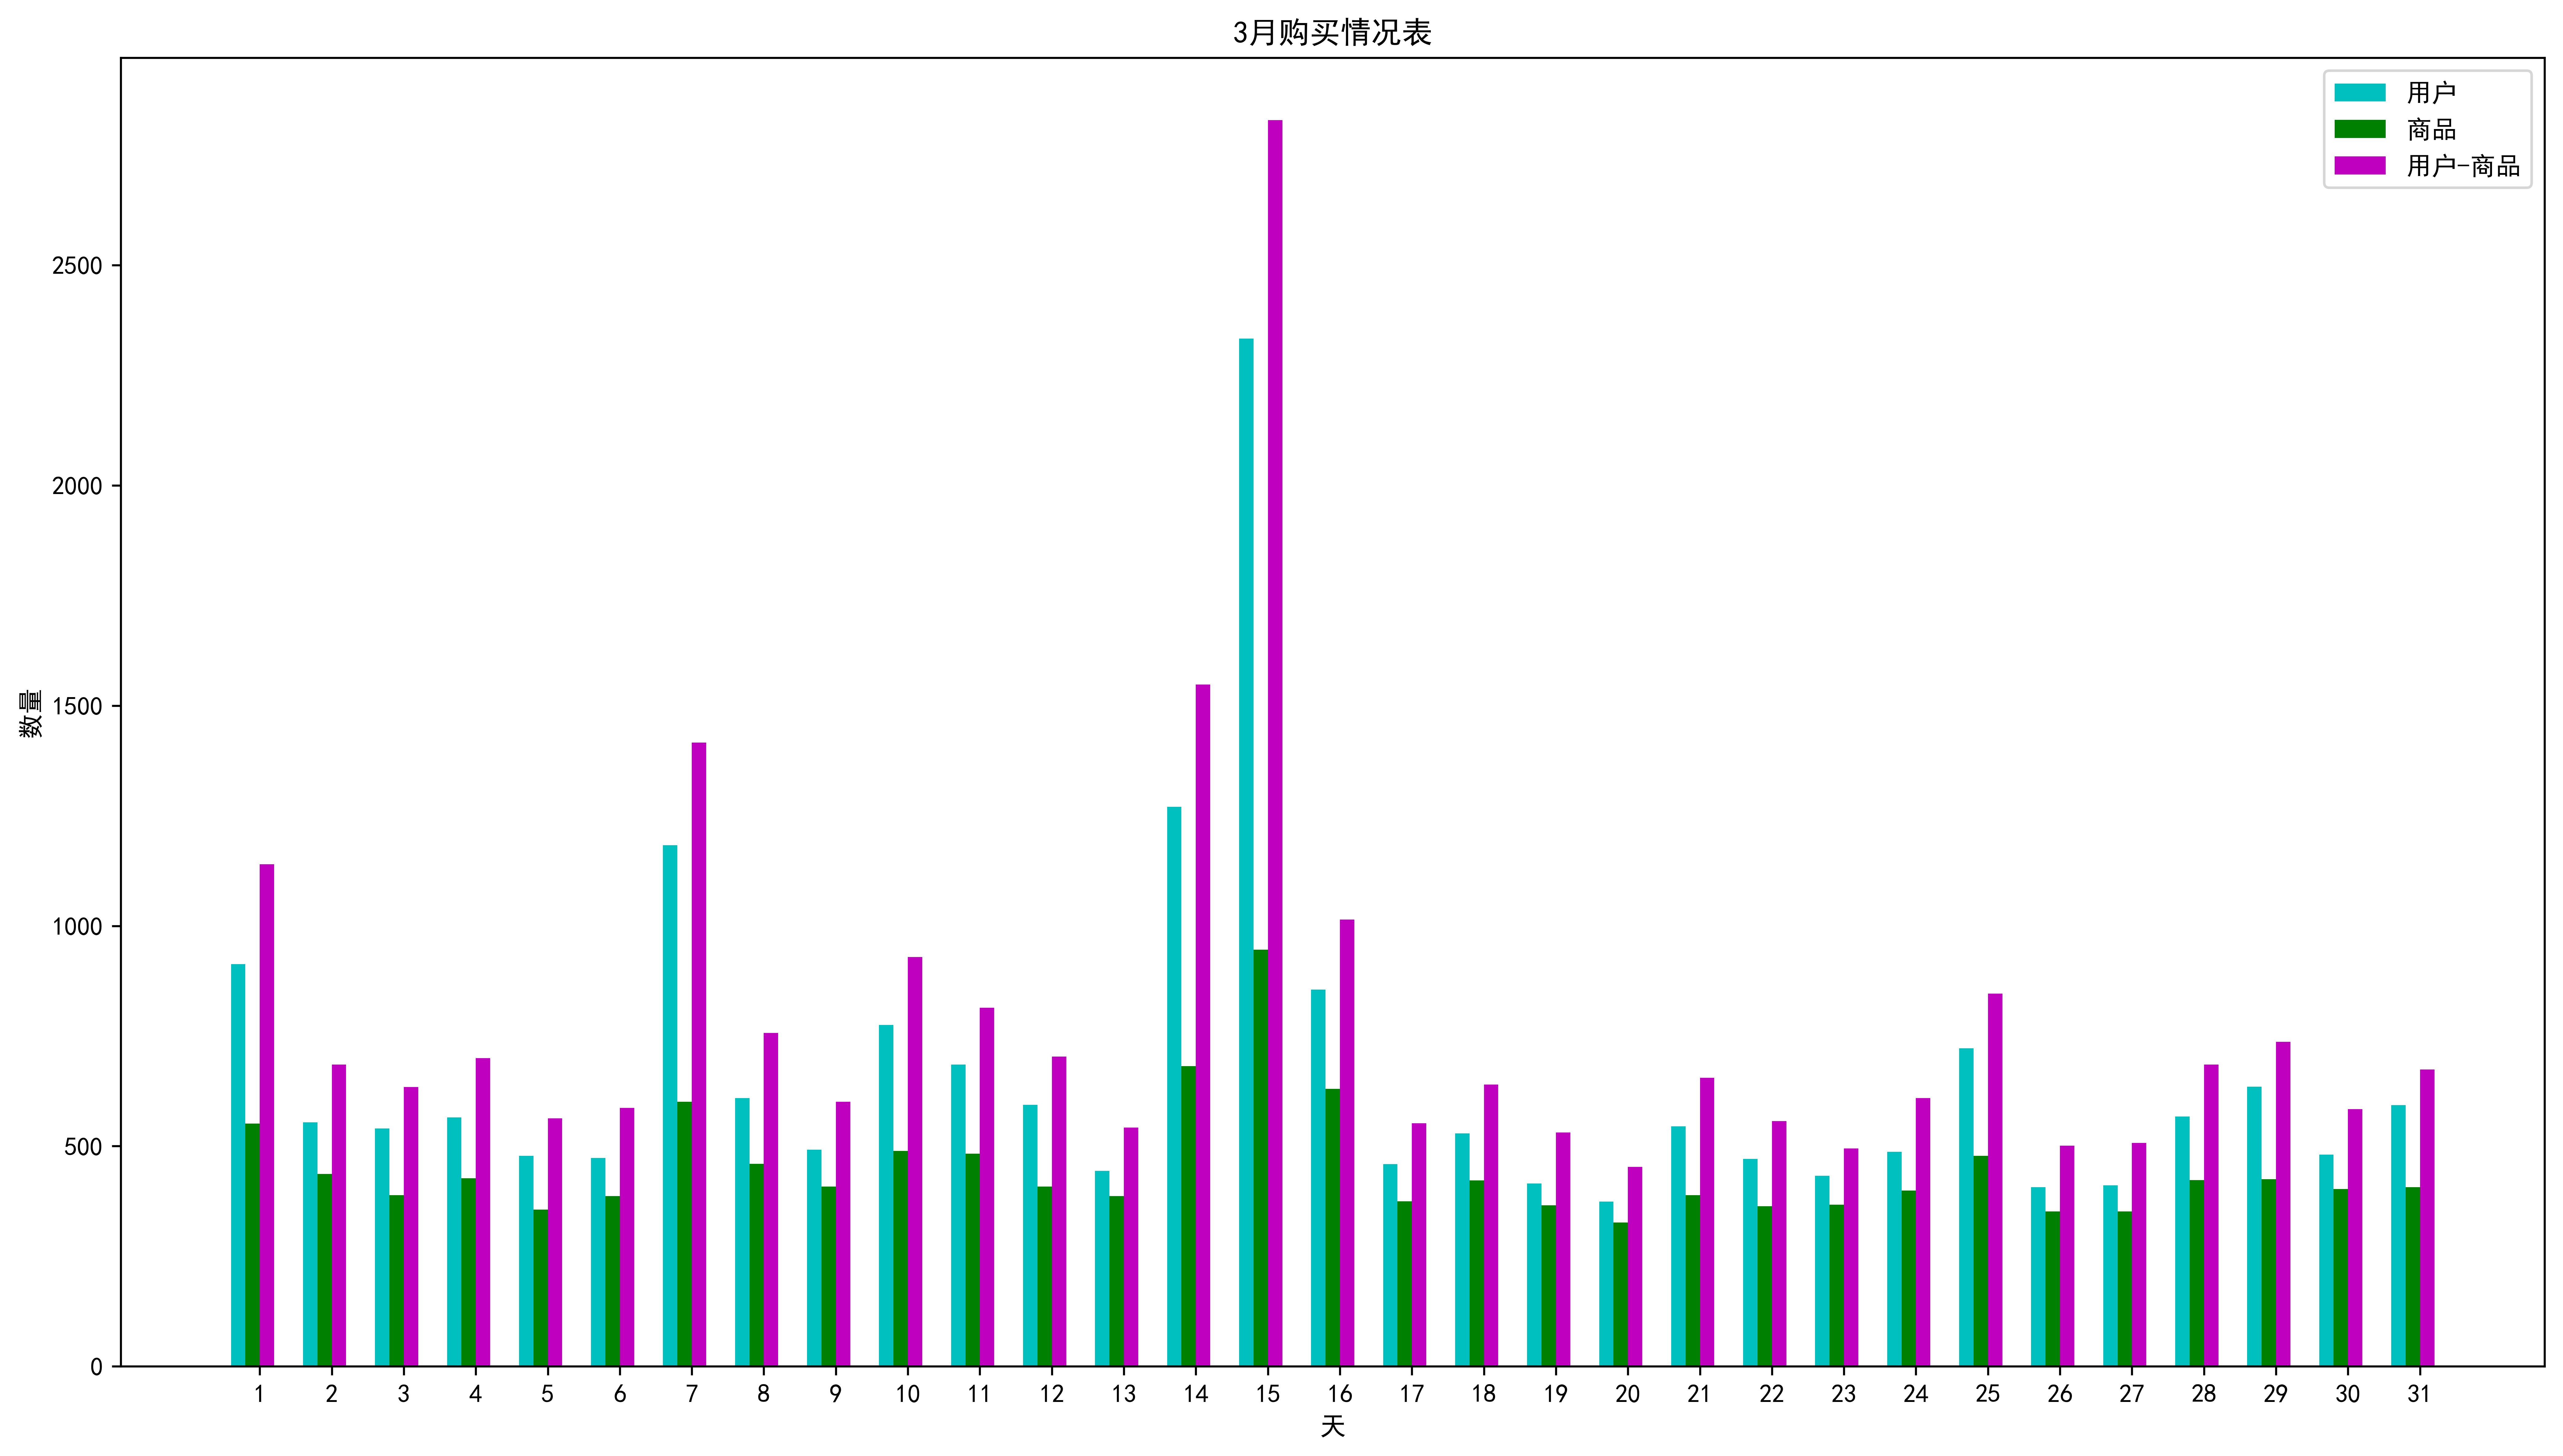

In [31]:
plt.rcParams['font.sans-serif']=['simhei']

plt.figure(figsize=(14,8),dpi=600)
bar_width = 0.2

plt.bar(user['天'], user['用户数量'], bar_width, color='c', label='用户')#画出每天购买记录对应的用户总数
plt.bar(product['天']+bar_width, product['商品数量'], bar_width,color='g', label='商品')#画出每天购买记录对应的商品总数
plt.bar(action_groupByTime['天']+bar_width*2, action_groupByTime['用户-商品数量'],bar_width,  color='m', label='用户-商品')#画出每天购买记录总数


plt.xlabel('天');plt.ylabel('数量');plt.title('3月购买情况表')

day_range = range(1,len(user['天']) + 1, 1)
plt.xticks(user['天'] + bar_width * 3 / 2., day_range)

plt.tight_layout() 

plt.legend() 

上诉结果解释：3月14日、15日、16日，出现购物大井喷。总体来看，购物记录多余2月份

2.2.3.统计2016年4月每天的购买记录总数、对应的用户总数、商品总数

In [32]:
action = get_user_product_action_data(fname=ACTION_201604_FILE) 
action

,用户ID,商品ID,时间
74,250576,162108,2016-04-01 00:00:00
999,264694,5825,2016-04-01 00:01:00
1007,266911,5825,2016-04-01 00:01:00
...,...,...,...
13197264,275840,18412,2016-04-15 23:56:00
13198552,291147,70491,2016-04-15 23:58:00
13199289,254642,25003,2016-04-15 23:59:00


In [33]:
action['时间'] = pd.to_datetime(action['时间']).apply(lambda x: x.day)

In [34]:
action

,用户ID,商品ID,时间
74,250576,162108,1
999,264694,5825,1
1007,266911,5825,1
...,...,...,...
13197264,275840,18412,15
13198552,291147,70491,15
13199289,254642,25003,15


In [36]:
user = action.groupby('时间')['用户ID'].nunique()
user = user.to_frame().reset_index()
user.columns = ['天', '用户数量']

product = action.groupby('时间')['商品ID'].nunique()
product = product.to_frame().reset_index()
product.columns = ['天', '商品数量']

action_groupByTime = action.groupby('时间', as_index=False).size()
# action_groupByTime = action_groupByTime.to_frame().reset_index()
action_groupByTime.columns = ['天', '用户-商品数量']

In [37]:
user.head()

,天,用户数量
0,1,613
1,2,508
2,3,445
3,4,471
4,5,489


In [38]:
product.head()

,天,商品数量
0,1,396
1,2,363
2,3,343
3,4,357
4,5,364


In [39]:
action_groupByTime.head()

,天,用户-商品数量
0,1,685
1,2,567
2,3,515
3,4,529
4,5,568


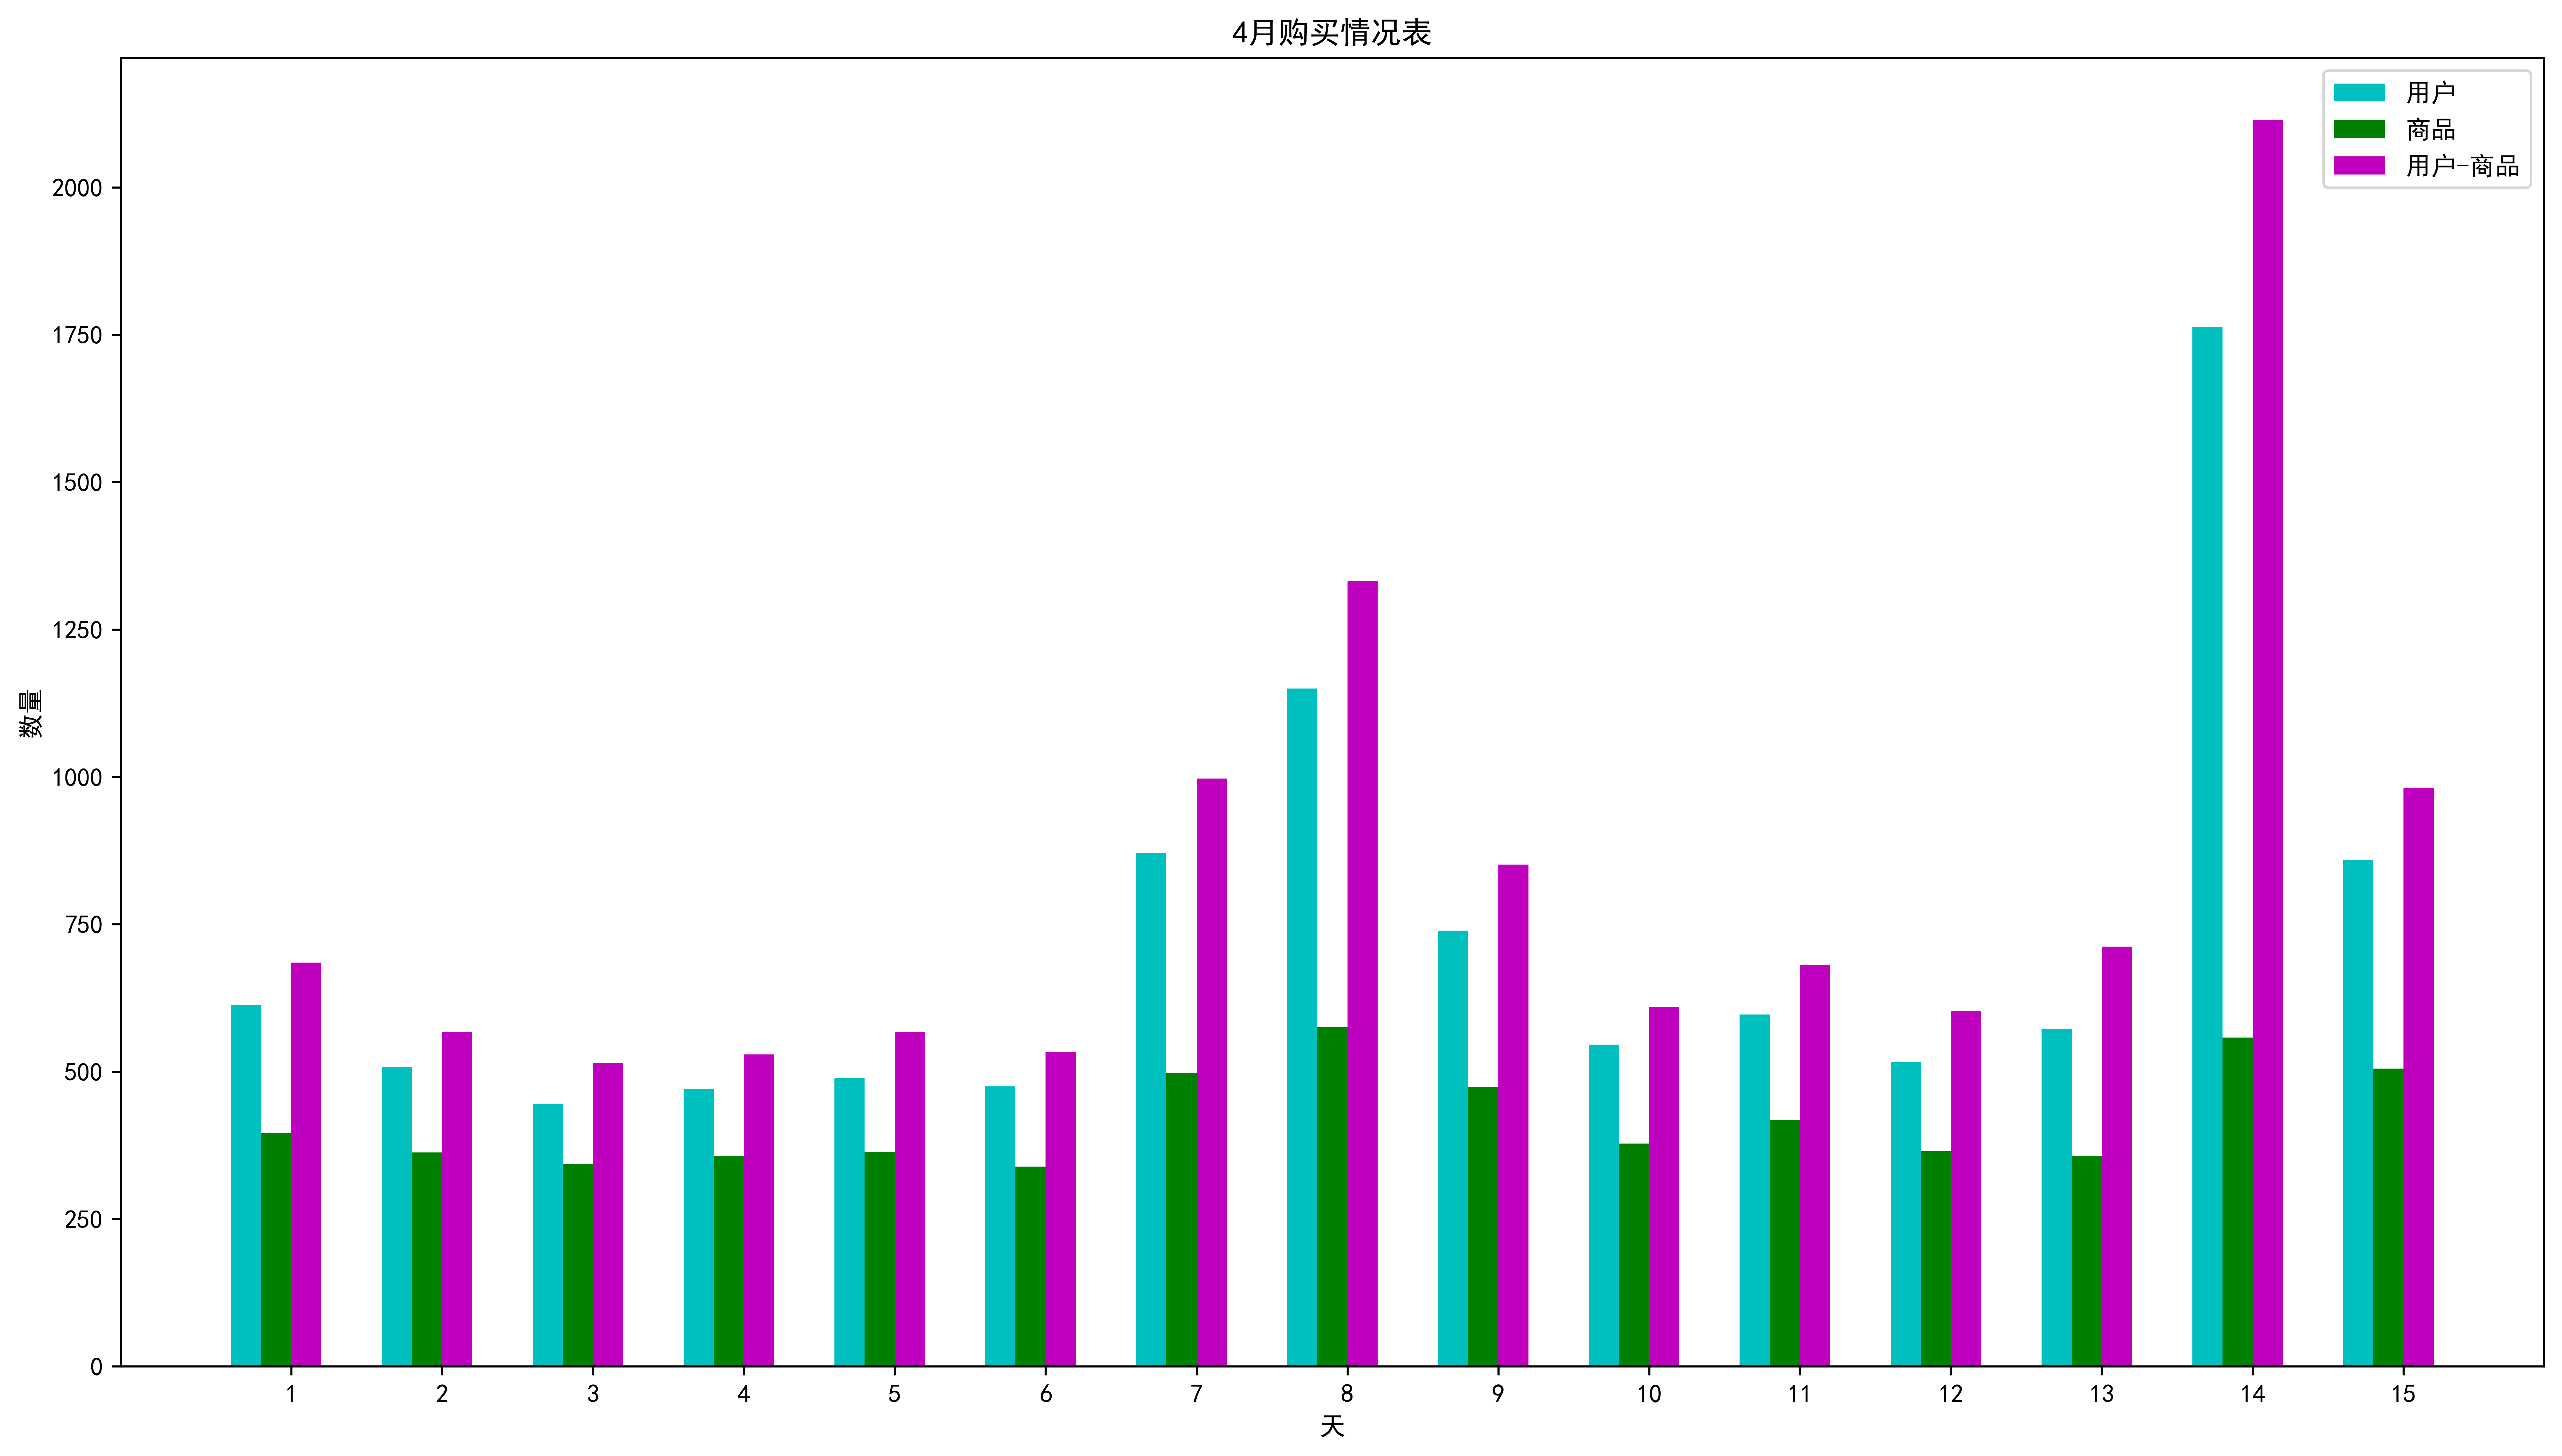

In [40]:
plt.rcParams['font.sans-serif']=['simhei'] 

plt.figure(figsize=(14,8),dpi=600)
bar_width = 0.2

plt.bar(user['天'], user['用户数量'], bar_width, color='c', label='用户')
plt.bar(product['天']+bar_width, product['商品数量'], bar_width,color='g', label='商品')
plt.bar(action_groupByTime['天']+bar_width*2, action_groupByTime['用户-商品数量'],bar_width,  color='m', label='用户-商品')


plt.xlabel('天');plt.ylabel('数量');plt.title('4月购买情况表')

day_range = range(1,len(user['天']) + 1, 1)
plt.xticks(user['天'] + bar_width * 3 / 2., day_range)

plt.tight_layout() 

plt.legend()

**2.3.统计8类商品每个月每天的购买情况**

统计三个月的购买记录中第8类商品销售总数随着时间的变化情况

调用get_class_brand_action_time函数，分块读取2、3、4月数据

In [41]:
action2 = get_class_brand_action_time(fname=ACTION_201602_FILE)
action3 = get_class_brand_action_time(fname=ACTION_201603_FILE)
action4 = get_class_brand_action_time(fname=ACTION_201604_FILE)

展示读取的2月份行为数据

In [42]:
action2

,商品类别,商品品牌,行为类别,时间
331,9,306,4,2016-02-01 00:01:00
629,4,174,4,2016-02-01 00:02:00
960,5,78,4,2016-02-01 00:03:00
...,...,...,...,...
11478521,4,375,4,2016-02-29 23:50:00
11480851,6,489,4,2016-02-29 23:54:00
11483908,4,800,4,2016-02-29 23:58:00


In [43]:
action2['时间'] = pd.to_datetime(action2['时间']).apply(lambda x: x.day)
action3['时间'] = pd.to_datetime(action3['时间']).apply(lambda x: x.day)
action4['时间'] = pd.to_datetime(action4['时间']).apply(lambda x: x.day)

以d_ac2为例，展示处理时间字段后的行为数据

In [44]:
action2

,商品类别,商品品牌,行为类别,时间
331,9,306,4,1
629,4,174,4,1
960,5,78,4,1
...,...,...,...,...
11478521,4,375,4,29
11480851,6,489,4,29
11483908,4,800,4,29


按照月份，统计每一天的购买记录中第8类商品总数

In [45]:
action2_class8 = action2[action2['商品类别']==8]
action2_class8 = action2_class8['商品品牌'].groupby(action2_class8['时间']).count()
action2_class8 = action2_class8.to_frame().reset_index()
action2_class8.columns = ['天', '商品数量']

action3_class8 = action3[action3['商品类别']==8]
action3_class8 = action3_class8['商品品牌'].groupby(action3_class8['时间']).count()
action3_class8 = action3_class8.to_frame().reset_index()
action3_class8.columns = ['天', '商品数量']

action4_class8 = action4[action4['商品类别']==8]
action4_class8 = action4_class8['商品品牌'].groupby(action4_class8['时间']).count()
action4_class8 = action4_class8.to_frame().reset_index()
action4_class8.columns = ['天', '商品数量']

以2月份的统计结果为例，展示一下2月份每一天的购买记录中第8类商品总数

In [46]:
action2_class8.head()

,天,商品数量
0,1,90
1,2,84
2,3,78
3,4,47
4,5,26


画图展会三个月每一天的购买记录中商品类别为8的商品总数

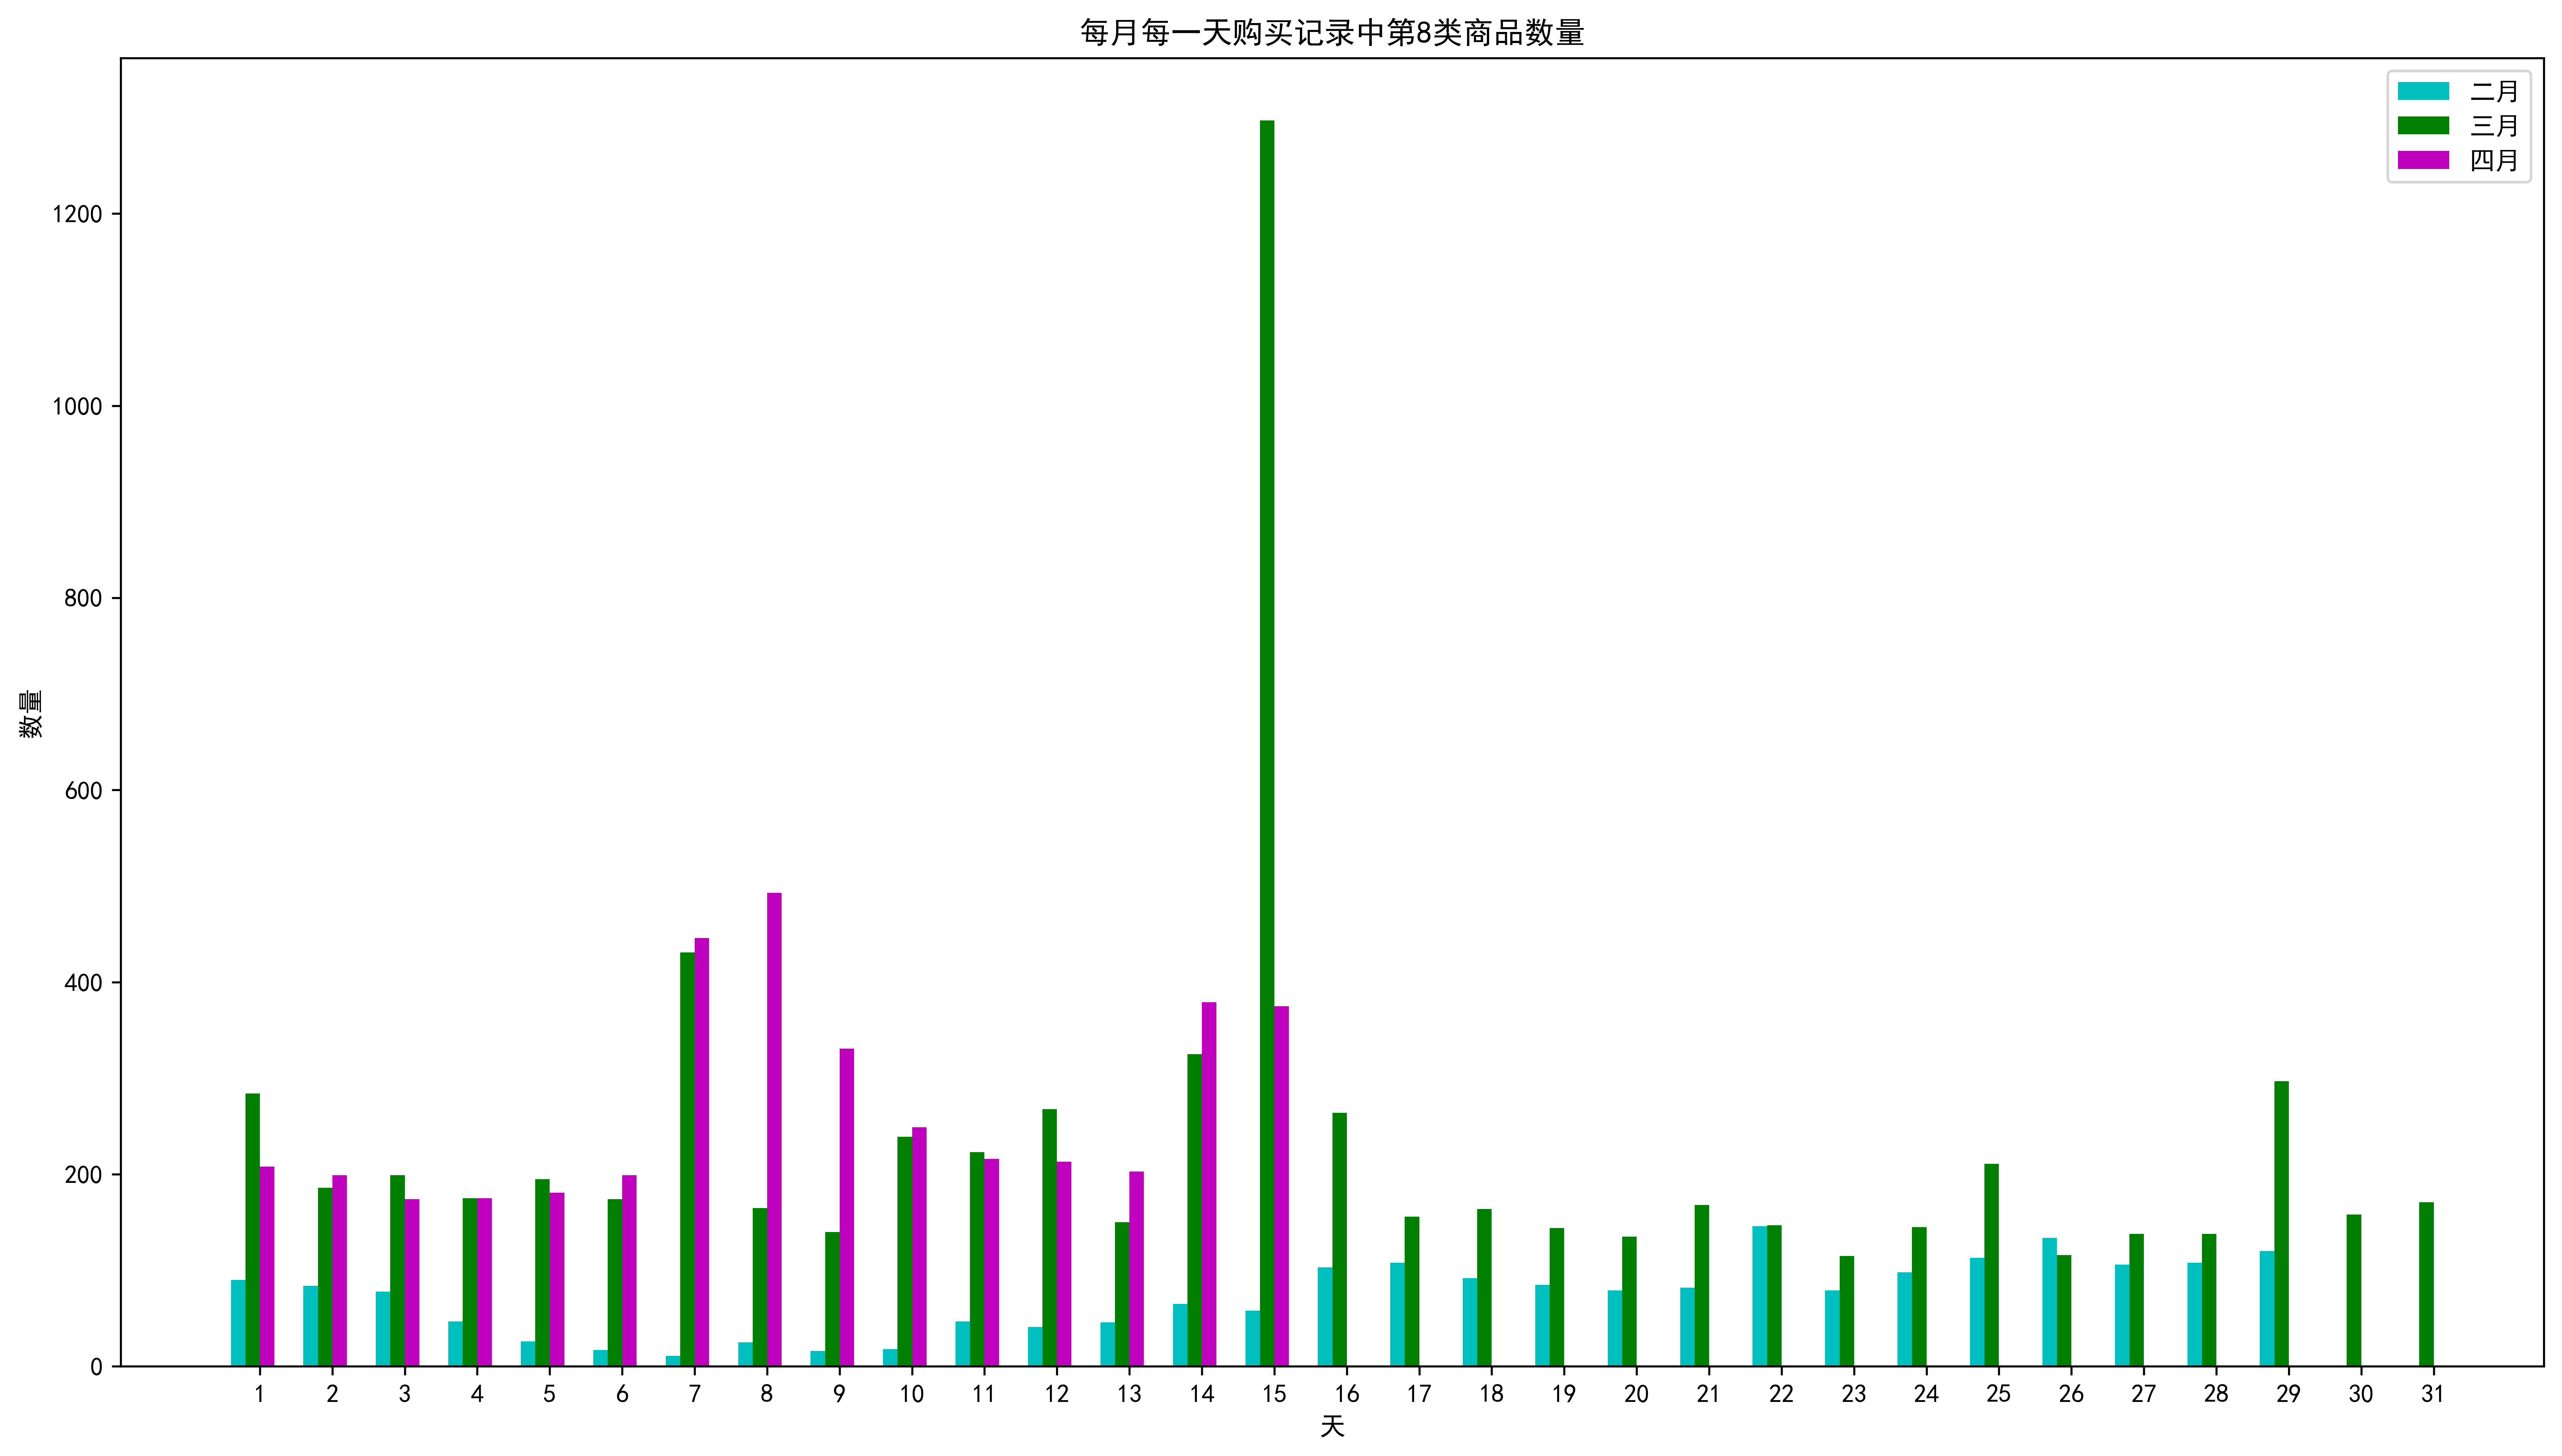

In [47]:
plt.rcParams['font.sans-serif']=['simhei'] 

plt.figure(figsize=(14,8),dpi=600)
bar_width = 0.2

plt.bar(action2_class8['天'], action2_class8['商品数量'], bar_width, color='c', label='二月')
plt.bar(action3_class8['天']+bar_width, action3_class8['商品数量'],bar_width, color='g', label='三月')
plt.bar(action4_class8['天']+bar_width*2, action4_class8['商品数量'],bar_width,color='m', label='四月')


plt.xlabel('天');plt.ylabel('数量');plt.title('每月每一天购买记录中第8类商品数量')

day_range = range(1,len(action3_class8['天']) + 1, 1)
plt.xticks(action3_class8['天'] + bar_width * 3 / 2., day_range)

plt.tight_layout() 

plt.legend()

上诉结果解释：2月份对第8类商品的购买普遍偏低，3、4月份普遍偏高。3月15日购买极多，可以对比3月份的销售记录，发现类别8将近占了3月15日总销售的一般。同时发现，除了4月18日、9日和15日，3、4月份类别8销售在前半个月特别相似。

**2.4.查询给定用户和商品名称对应的行为数据**

编写函数special_user_action，分块读取行为数据中某个特定用户的ID、某个特定商品ID对应的行为类别和时间。

In [48]:
def special_user_action(fname, user_id, item_id, chunk_size=20000):
    reader = pd.read_csv(fname, chunksize = chunk_size, encoding = 'utf-8')
    chunks = []
    for chunk in reader:
        chunk= chunk[["用户ID", "商品ID", "行为类别", "时间"]]#读取“用户ID”，“商品ID”，“行为类别”，“时间”4个字段的数据
        chunks.append(chunk)
    action = pd.concat(chunks, ignore_index=True)

    action = action[(action['用户ID'] == user_id) & (action['商品ID'] == item_id)] 
    return action

编写select_user_action函数，调用special_user_action随机选取用户即商品读取数据

In [49]:
def select_user_action():
    #随机选择一个用户以及商品
    user_id = 250576
    item_id = 162108
    action = []#定义action空列表
    
    #调用special_user_action函数，获取2月份用户行为数据集中给定用户和商品的“行为类别”和“时间”
    action.append(special_user_action(ACTION_201602_FILE, user_id, item_id))
    
    #调用special_user_action函数，获取3月份用户行为数据集中给定用户和商品的“行为类别”和“时间”
    action.append(special_user_action(ACTION_201603_FILE, user_id, item_id))
    
    #调用special_user_action函数，获取4月份用户行为数据集中给定用户和商品的“行为类别”和“时间”
    action.append(special_user_action(ACTION_201604_FILE, user_id, item_id))
    
    action = pd.concat(action, ignore_index=False)
    
    print(action.sort_values(by='时间'))

调用select_user_action函数，获取行为数据

In [50]:
select_user_action() 
action = action.sort_values(by='时间')#将得到的数据，按“时间”排序

           用户ID    商品ID  行为类别                   时间
2773517  250576  162108     1  2016-03-04 20:06:02
2773554  250576  162108     6  2016-03-04 20:06:04
2794624  250576  162108     1  2016-03-04 20:30:17
...         ...     ...   ...                  ...
1712641  250576  162108     6  2016-04-03 10:04:04
1712644  250576  162108     1  2016-04-03 10:04:04
1712653  250576  162108     6  2016-04-03 10:04:04

[368 rows x 4 columns]
